In [1]:
import re

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = '../../data/clean/'

with open(f'{DATA_DIR}misconduct_indicators_train.pkl', 'rb') as train_file:
    indicated_misconduct = pickle.load(train_file)

In [12]:
import random

In [14]:
t = list(indicated_misconduct.disposition_type)
random.shuffle(t)

In [20]:
len(indicated_misconduct.disposition_type[np.array(indicated_misconduct.disposition_type) == np.array(t)])

589

In [3]:
def normalize_column_name(string):
    return re.sub('\s', '_', string).lower()

indicated_misconduct = pd.concat(
    [
        indicated_misconduct,
        pd.get_dummies(
            indicated_misconduct['disposition_type'],
            prefix='disposition_type'
        )
    ],
    axis=1
)

indicated_misconduct = indicated_misconduct.drop('disposition_type', axis=1)
indicated_misconduct.columns = [
    normalize_column_name(col)
    for col
    in indicated_misconduct.columns
]


In [4]:
indicator_feature_originals = [
    'misconduct_type',
    'court_type',
    'enforcement_agency',
    'contracting_party',
    'disposition_type' # !
]

indicators_by_original = {
    orig : [
        col
        for col
        in indicated_misconduct.columns
        if re.search(f'^{orig}_', col)
    ]
    for orig
    in indicator_feature_originals
}

In [5]:
def categorrelations(data_frame, cols_for_x, cols_for_y):
    cors = pd.DataFrame(
        np.zeros((len(cols_for_y), len(cols_for_x))) + 10 # absurd seed
    )

    for y_ind, y_col in enumerate(cols_for_y):
        for x_ind, x_col in enumerate(cols_for_x):
            cors[x_ind][y_ind] = data_frame[y_col].corr(data_frame[x_col])

    cors.index = cols_for_y
    cors.columns = cols_for_x

    sns.heatmap(
        cors,
        vmin=-1,
        vmax=1,
        cmap="PiYG",
        annot=True
    );

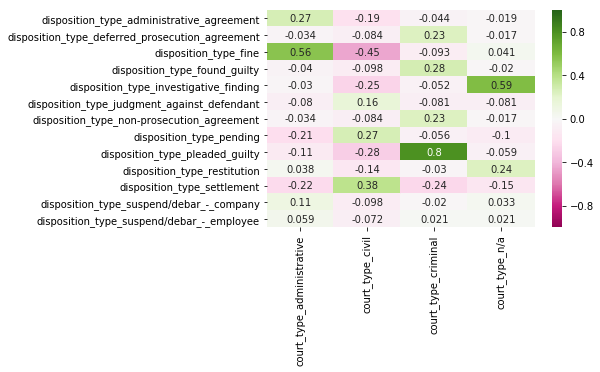

In [6]:
categorrelations(
    indicated_misconduct,
    cols_for_x=indicators_by_original['court_type'],
    cols_for_y=indicators_by_original['disposition_type']
)

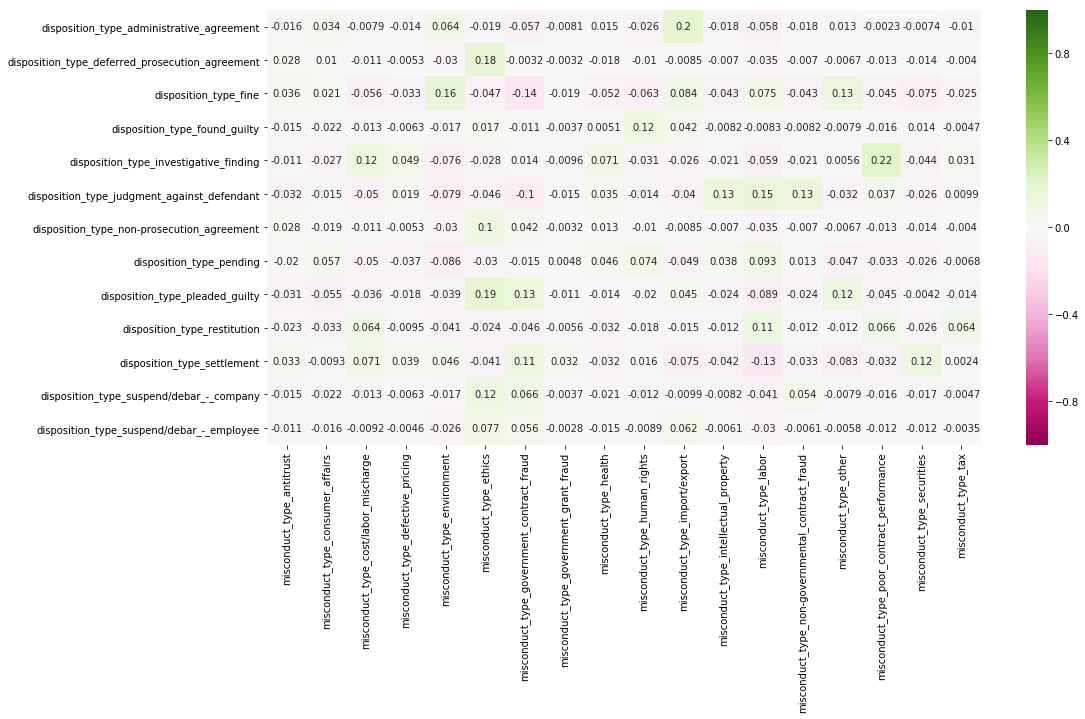

In [7]:
plt.figure(figsize=(16, 8))
categorrelations(
    indicated_misconduct,
    cols_for_x=indicators_by_original['misconduct_type'],
    cols_for_y=indicators_by_original['disposition_type']
)

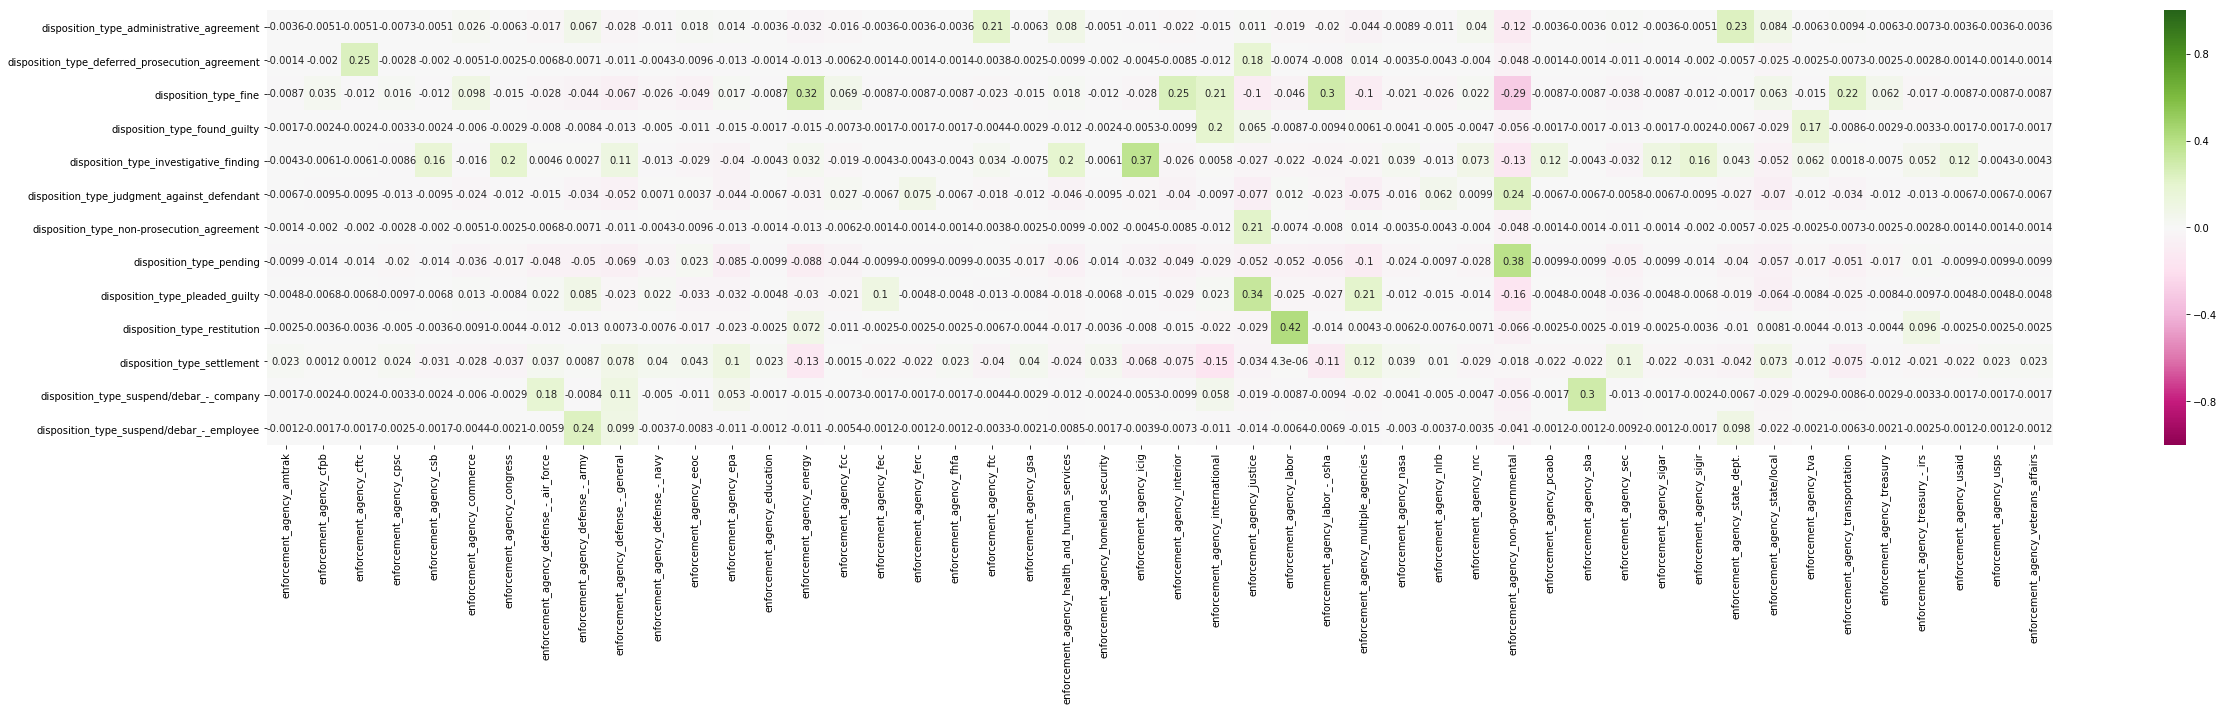

In [8]:
plt.figure(figsize=(40, 8))
categorrelations(
    indicated_misconduct,
    cols_for_x=indicators_by_original['enforcement_agency'],
    cols_for_y=indicators_by_original['disposition_type']
)

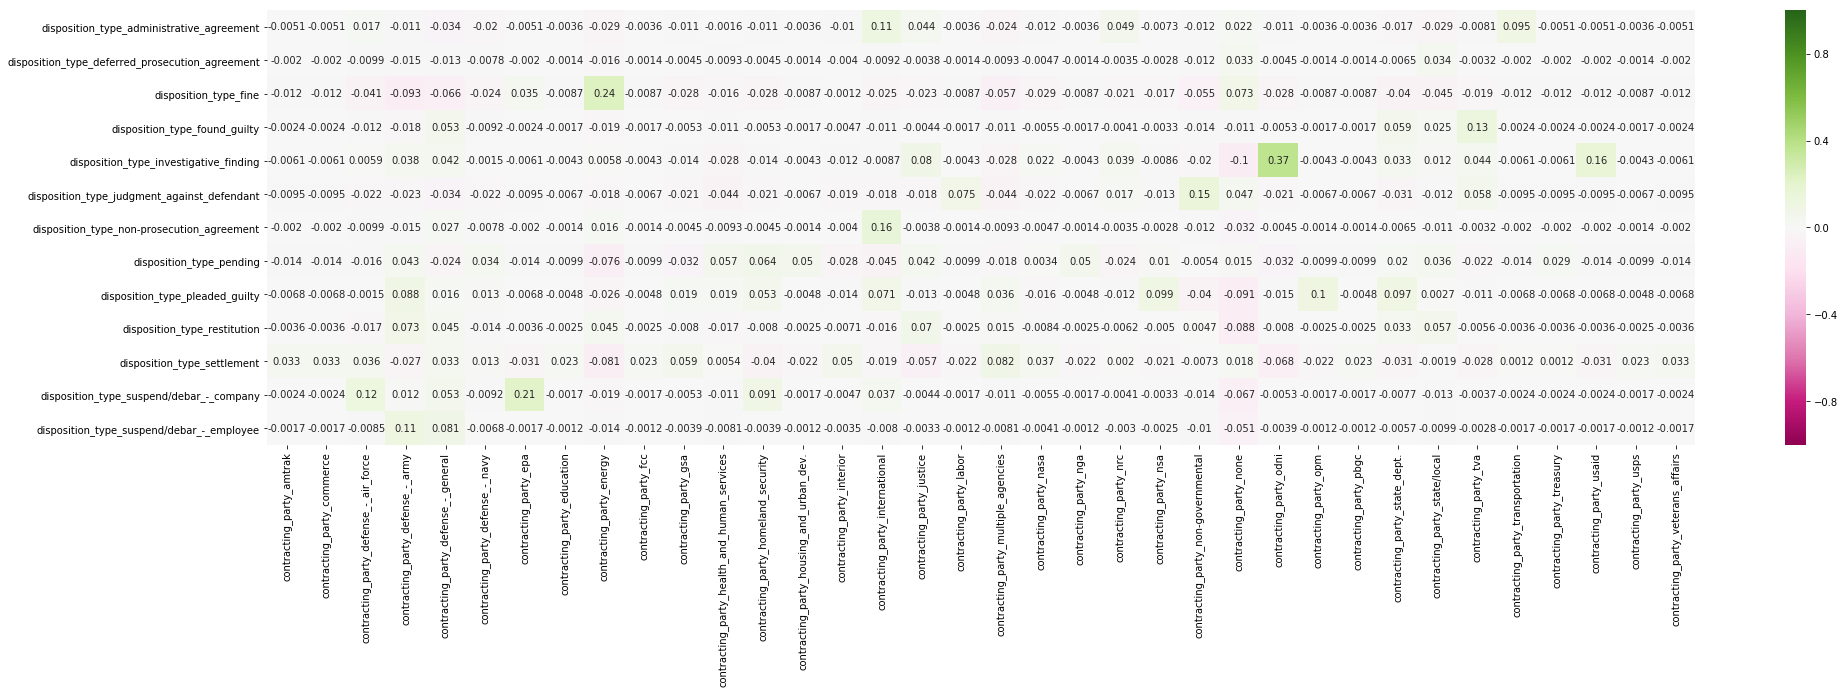

In [9]:
plt.figure(figsize=(32, 8))
categorrelations(
    indicated_misconduct,
    cols_for_x=indicators_by_original['contracting_party'],
    cols_for_y=indicators_by_original['disposition_type']
)